<a href="https://colab.research.google.com/github/wynalazca382/Poker-Cards-Recognizing/blob/main/Kartmistrz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import os
from google.colab import files
from IPython.display import display

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [2]:
! mkdir 1.Dataset

In [3]:
!pip install kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"planszoholik","key":"cbbd2da498d13b17c9cde6cc813dde13"}'}

In [5]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          17253        378  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                    2MB  2024-04-29 19:29:56           3756         86  1.0              
sahirmaharajj/college-exam-results-sat                           College Exam Results (SAT)                        10KB  2024-05-06 14:37:56           1391         31  1.0              
mexwell/heart-disease-dataset                                    🫀 Hea

In [8]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 99% 383M/385M [00:19<00:00, 16.8MB/s]
100% 385M/385M [00:19<00:00, 20.5MB/s]


In [9]:
! unzip cards-image-datasetclassification.zip -d 1.Dataset.

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: 1.Dataset./train/jack of spades/059.jpg  
  inflating: 1.Dataset./train/jack of spades/060.jpg  
  inflating: 1.Dataset./train/jack of spades/061.jpg  
  inflating: 1.Dataset./train/jack of spades/062.jpg  
  inflating: 1.Dataset./train/jack of spades/063.jpg  
  inflating: 1.Dataset./train/jack of spades/064.jpg  
  inflating: 1.Dataset./train/jack of spades/065.jpg  
  inflating: 1.Dataset./train/jack of spades/066.jpg  
  inflating: 1.Dataset./train/jack of spades/067.jpg  
  inflating: 1.Dataset./train/jack of spades/068.jpg  
  inflating: 1.Dataset./train/jack of spades/069.jpg  
  inflating: 1.Dataset./train/jack of spades/070.jpg  
  inflating: 1.Dataset./train/jack of spades/071.jpg  
  inflating: 1.Dataset./train/jack of spades/072.jpg  
  inflating: 1.Dataset./train/jack of spades/073.jpg  
  inflating: 1.Dataset./train/jack of spades/074.jpg  
  inflating: 1.Dataset./train/jack of spades/075.jpg  


In [26]:
data_dir = os.path.join("/content/1.Dataset.")

os.listdir(data_dir)

['53cards-53-(200 X 200)-100.00.h5',
 '14card types-14-(200 X 200)-94.61.h5',
 'test',
 'valid',
 'train',
 'cards.csv']

In [27]:
card_path = os.path.join(data_dir, 'cards.csv')

cards_csv = pd.read_csv(card_path)

print(f"File shape: {cards_csv.shape}\n")
print(f"Data columns: {cards_csv.columns}\n")

File shape: (8155, 5)

Data columns: Index(['class index', 'filepaths', 'labels', 'card type', 'data set'], dtype='object')



In [28]:
display(cards_csv.head(1))
print("\n\n")

print(f"\t######################## Train Data Sample ########################\n")
train_sample = cards_csv[cards_csv['data set'] == 'train'].sample(n=10)
display(train_sample)
print("\n\n")

print(f"\t######################## Test Data Sample ########################\n")
test_sample = cards_csv[cards_csv['data set'] == 'test'].sample(n=10)
display(train_sample)
print("\n\n")

print(f"\t######################## Validation Data Sample ########################\n")
valid_sample = cards_csv[cards_csv['data set'] == 'valid'].sample(n=10)
display(valid_sample)
print("\n\n")

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train





	######################## Train Data Sample ########################



,class index,filepaths,labels,card type,data set
4797,32,train/queen of spades/137.jpg,queen of spades,queen,train
3916,27,train/nine of hearts/006.jpg,nine of hearts,nine,train
5031,34,train/seven of diamonds/101.jpg,seven of diamonds,seven,train
5643,38,train/six of diamonds/129.jpg,six of diamonds,six,train
507,3,train/ace of spades/087.jpg,ace of spades,ace,train
3412,23,train/king of hearts/031.jpg,king of hearts,king,train
2771,18,train/jack of hearts/108.jpg,jack of hearts,jack,train
4151,28,train/nine of spades/108.jpg,nine of spades,nine,train
3077,20,train/joker/074.jpg,joker,xxx,train
5254,36,train/seven of spades/057.jpg,seven of spades,seven,train





	######################## Test Data Sample ########################



,class index,filepaths,labels,card type,data set
4797,32,train/queen of spades/137.jpg,queen of spades,queen,train
3916,27,train/nine of hearts/006.jpg,nine of hearts,nine,train
5031,34,train/seven of diamonds/101.jpg,seven of diamonds,seven,train
5643,38,train/six of diamonds/129.jpg,six of diamonds,six,train
507,3,train/ace of spades/087.jpg,ace of spades,ace,train
3412,23,train/king of hearts/031.jpg,king of hearts,king,train
2771,18,train/jack of hearts/108.jpg,jack of hearts,jack,train
4151,28,train/nine of spades/108.jpg,nine of spades,nine,train
3077,20,train/joker/074.jpg,joker,xxx,train
5254,36,train/seven of spades/057.jpg,seven of spades,seven,train





	######################## Validation Data Sample ########################



,class index,filepaths,labels,card type,data set
7968,15,valid/four of spades/4.jpg,four of spades,four,valid
7987,19,valid/jack of spades/3.jpg,jack of spades,jack,valid
8029,27,valid/nine of hearts/5.jpg,nine of hearts,nine,valid
7890,0,valid/ace of clubs/1.jpg,ace of clubs,ace,valid
7911,4,valid/eight of clubs/2.jpg,eight of clubs,eight,valid
7997,21,valid/king of clubs/3.jpg,king of clubs,king,valid
8058,33,valid/seven of clubs/4.jpg,seven of clubs,seven,valid
7947,11,valid/five of spades/3.jpg,five of spades,five,valid
8127,47,valid/three of hearts/3.jpg,three of hearts,three,valid
7993,20,valid/joker/4.jpg,joker,xxx,valid


In [29]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

In [30]:
train_sample.filepaths.to_list()

['train/queen of spades/137.jpg',
 'train/nine of hearts/006.jpg',
 'train/seven of diamonds/101.jpg',
 'train/six of diamonds/129.jpg',
 'train/ace of spades/087.jpg',
 'train/king of hearts/031.jpg',
 'train/jack of hearts/108.jpg',
 'train/nine of spades/108.jpg',
 'train/joker/074.jpg',
 'train/seven of spades/057.jpg']

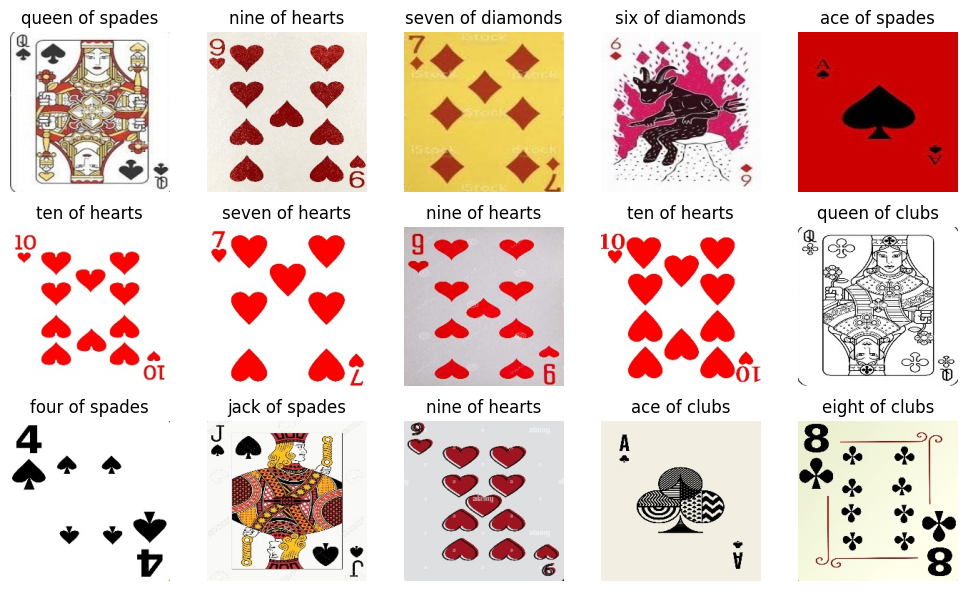

In [31]:
train_filepaths = train_sample.filepaths.to_list()[:5]
test_filepaths = test_sample.filepaths.to_list()[:5]
valid_filepaths = valid_sample.filepaths.to_list()[:5]

image_filepaths = train_filepaths + test_filepaths + valid_filepaths
image_files = [os.path.join(data_dir, file) for file in image_filepaths]

num_images = len(image_files)
num_rows = 3
num_cols = num_images // num_rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols
    image = plt.imread(image_file)
    axs[row, col].imshow(image)
    axs[row, col].set_title(image_file.split("/")[-2])
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [32]:
labels = os.listdir(os.path.join(data_dir, 'train'))
labels = sorted(labels)
print(labels)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [40]:
train_datagen = ImageDataGenerator(rescale = 1/224.0
                                  #, rotation_range = 90
                                  #, width_shift_range = 0.7
                                  #, height_shift_range = 0.7
                                  #, zoom_range = 0.5
                                  #, horizontal_flip = True
                                  #, vertical_flip = True
                                  #, fill_mode= 'nearest'
                                   )

train_gen = train_datagen.flow_from_directory(train_dir
                                              , target_size = (224, 224)
                                              , batch_size = 70
                                              , class_mode = 'categorical' )

valid_datagen = ImageDataGenerator(rescale = 1/224.0)

valid_gen = valid_datagen.flow_from_directory(valid_dir
                                              , target_size = (224, 224)
                                              , batch_size = 25
                                              , class_mode ='categorical')

test_datagen = ImageDataGenerator(rescale = 1/224.0)

test_gen = test_datagen.flow_from_directory(test_dir
                                            , target_size = (224, 224)
                                            , batch_size = 25
                                            , class_mode = 'categorical')

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [43]:
lr = 0.001
batch_size = 10
epoch_size = 10

adam_optimizer = Adam(learning_rate = lr)
rmsprop_optimizer = RMSprop(learning_rate = lr)

In [44]:
model = Sequential([ # Defining Convolution layers.

                    ## First convolution layer.
                    Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Second convolutional layer.
                    , Conv2D(32, (3, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Third convolutional layer.
                    , Conv2D(64, (3, 3), activation = 'relu')
                    , MaxPooling2D((3,3))
                    ## Fourth convolutional layer.
                    , Conv2D(128, (3, 3), activation = 'relu')

                    # Defining Dense neuroal network layers.

                    ## Flattent input layer.
                    , Flatten()
                    ## Firest hidden layer.
                    , Dense(256, activation = 'relu')
                    ## Second hidden layer.
                    , Dense(128, activation = 'relu')
                    ## Output layer.
                    , Dense(53, activation = 'softmax')
                    ])


model.compile(optimizer = rmsprop_optimizer
              , loss = 'categorical_crossentropy'
              , metrics = ['accuracy'])

## Training model
history = model.fit(train_gen
                    , epochs = epoch_size
                    , validation_data = valid_gen
                    , verbose = 1)

Epoch 1/10
109/109 [==============================] - 134s 1s/step - loss: 3.3215 - accuracy: 0.1465 - val_loss: 2.0819 - val_accuracy: 0.3547
Epoch 2/10
109/109 [==============================] - 133s 1s/step - loss: 2.2284 - accuracy: 0.3442 - val_loss: 1.6009 - val_accuracy: 0.4604
Epoch 3/10
109/109 [==============================] - 132s 1s/step - loss: 1.8510 - accuracy: 0.4466 - val_loss: 1.3763 - val_accuracy: 0.5208
Epoch 4/10
109/109 [==============================] - 139s 1s/step - loss: 1.5476 - accuracy: 0.5454 - val_loss: 1.1844 - val_accuracy: 0.6604
Epoch 5/10
109/109 [==============================] - 133s 1s/step - loss: 1.2564 - accuracy: 0.6359 - val_loss: 1.1396 - val_accuracy: 0.6792
Epoch 6/10
109/109 [==============================] - 134s 1s/step - loss: 1.0081 - accuracy: 0.7072 - val_loss: 0.8353 - val_accuracy: 0.7660
Epoch 7/10
109/109 [==============================] - 134s 1s/step - loss: 0.7704 - accuracy: 0.7781 - val_loss: 1.1271 - val_accuracy: 0.7396

,loss,accuracy,val_loss,val_accuracy
0,3.321547,0.146511,2.081941,0.354717
1,2.228369,0.344176,1.600863,0.460377
2,1.851044,0.446616,1.376309,0.520755
3,1.547597,0.545383,1.184373,0.660377
4,1.256361,0.635887,1.139571,0.679245
5,1.008110,0.707240,0.835259,0.766038
6,0.770437,0.778069,1.127085,0.739623
7,0.558868,0.834339,1.176077,0.743396
8,0.401077,0.883395,1.215898,0.773585
9,0.302248,0.915136,1.165035,0.803774


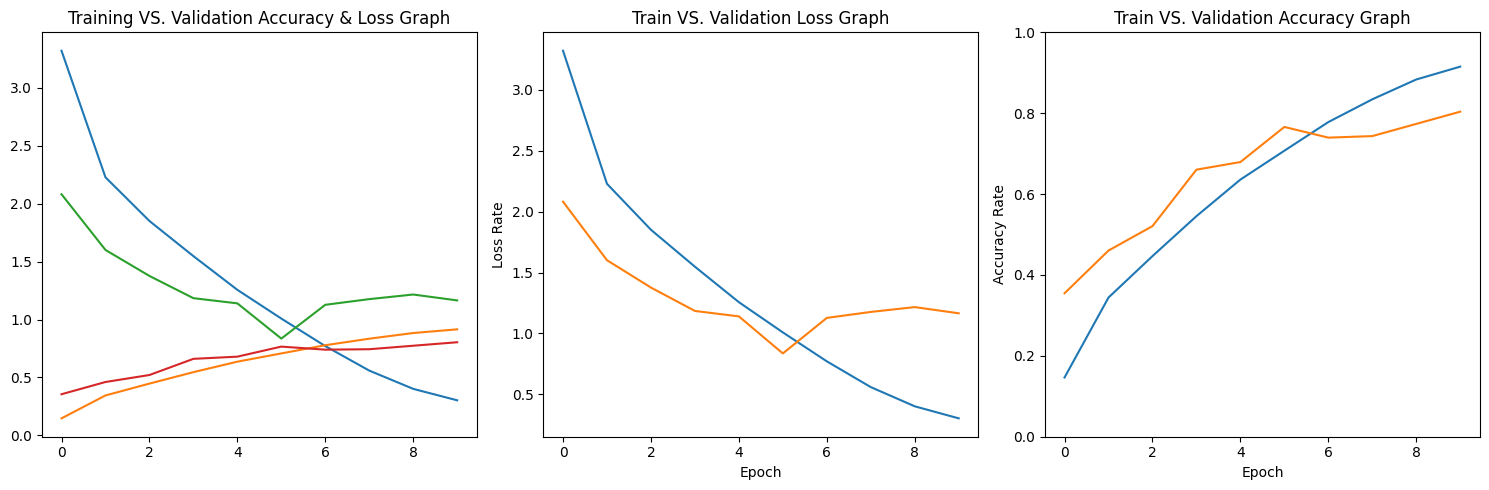

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

history_df = pd.DataFrame(history.history)
display(history_df.head(20))
print('\n\n')

axes[0].plot(history_df)
axes[0].set_title('Training VS. Validation Accuracy & Loss Graph')
axes[0].grid(False)

loss_df = history_df[['loss', 'val_loss']]
axes[1].plot(loss_df)
axes[1].set_title('Train VS. Validation Loss Graph')
axes[1].set_ylabel('Loss Rate')
axes[1].set_xlabel('Epoch')
axes[1].grid(False)

accuracy_df = history_df[['accuracy', 'val_accuracy']]
axes[2].plot(accuracy_df)
axes[2].set_title('Train VS. Validation Accuracy Graph')
axes[2].set_ylabel('Accuracy Rate')
axes[2].set_xlabel('Epoch')
axes[2].set_ylim(0, 1)
axes[2].grid(False)

plt.tight_layout()
plt.show()


In [46]:
model.save('/content/3.Model/model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
files.download('/content/3.Model/model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
model.evaluate(test_gen)

11/11 [==============================] - 2s 143ms/step - loss: 1.3241 - accuracy: 0.7509


[1.3240681886672974, 0.7509434223175049]

Testy

In [21]:
from tensorflow.keras.models import load_model
model = load_model('3.Model/model_1.h5')

Saving 5.jpg to 5.jpg
1/1 [==============================] - 0s 71ms/step


 Model prediction ---> 11
 The card is a: five of spades




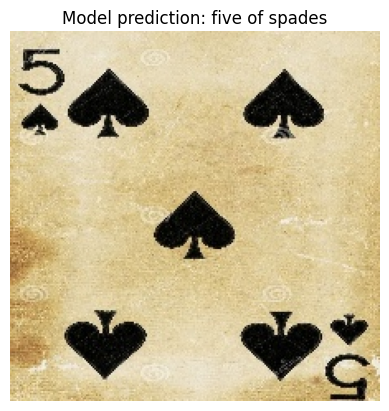

In [49]:
upload = files.upload()

for filename in upload.keys():

    img_arr = load_img(filename, target_size = (224, 224))
    img_arr = img_to_array(img_arr)
    img_arr = img_arr/224.0

    img_arr = np.expand_dims(img_arr, axis = 0)

    pred = model.predict(img_arr)
    pred_value = np.argmax(pred[0])
    card_name = labels[pred_value]
    print(f"\n\n Model prediction ---> {pred_value}")
    print(f" The card is a: {card_name}\n\n")

    title = 'Model prediction: ' + card_name
    img_show = plt.imread(filename)
    plt.imshow(img_show)
    plt.axis('off')
    plt.title(title)

plt.show();

1/1 [==============================] - 0s 21ms/step


 Model prediction ---> 34
 The card is a: seven of diamonds




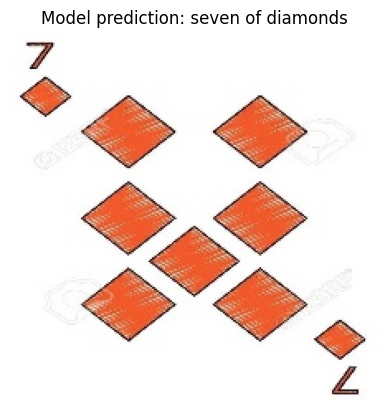

In [50]:
path = os.path.join('/content/1.Dataset./test/seven of diamonds/5.jpg')

img = load_img(path, target_size = (224, 224))
img_arr = img_to_array(img)
img_arr = img_arr/224.0

img_arr = np.expand_dims(img_arr, axis = 0)
img_arr = np.vstack([img_arr])

pred = model.predict(img_arr)
pred_value = np.argmax(pred[0])
card_name = labels[pred_value]
print(f"\n\n Model prediction ---> {pred_value}")
print(f" The card is a: {card_name}\n\n")

title = 'Model prediction: ' + card_name
img_show = plt.imread(path)
plt.imshow(img_show)
plt.axis('off')
plt.title(title);